# Jigsaw Toxic Comment Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
# Uncomment the command below and use to add all imported modules 
# of this notebook to the `requirements.txt` file
#
#!pipreqsnb --force /home/workboots/Repos/jigsaw-toxic-comment-classification

## Loading Training Data

In [5]:
train_path = "/home/workboots/Datasets/jigsaw-toxic-comment-classification/raw/train.csv"

In [6]:
train_df = pd.read_csv(train_path)

In [7]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Getting counts of each category

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
train_df.columns.values

array(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'], dtype=object)

In [30]:
def get_type(row, column_names):
    val = ""
    for col in column_names:
        if type(row[col]) == int and row[col] == 1:
            val += " " + col

    if val == "":
        val = None
    return val

In [31]:
del train_df["category"]

In [32]:
train_df["category"] = train_df.apply(get_type, axis=1, column_names=train_df.columns.values)

In [33]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,None
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,None
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,None
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,None
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,None


In [35]:
train_df.value_counts("category")

category
 toxic                                                     5666
 toxic obscene insult                                      3800
 toxic obscene                                             1758
 toxic insult                                              1215
 toxic severe_toxic obscene insult                          989
 toxic obscene insult identity_hate                         618
 obscene                                                    317
 insult                                                     301
 toxic severe_toxic obscene insult identity_hate            265
 obscene insult                                             181
 toxic severe_toxic obscene                                 158
 toxic identity_hate                                        136
 toxic insult identity_hate                                 134
 toxic obscene threat insult                                131
 toxic threat                                               113
 toxic severe_toxic obscene thr

In [36]:
train_df["category"].isnull().sum()

143346

In [37]:
len(train_df)

159571

In [38]:
percent_missing = train_df["category"].isnull().sum() * 100 / len(train_df)

In [39]:
percent_missing

89.83211235124176

The dataset is a multi-label dataset with over 89% of the data having no labels.

In [40]:
num_present = len(train_df) - train_df["category"].isnull().sum()

In [41]:
num_present

16225

Getting number of instances of each category

In [76]:
categories = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [91]:
counts = train_df[categories].sum()

In [92]:
counts

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

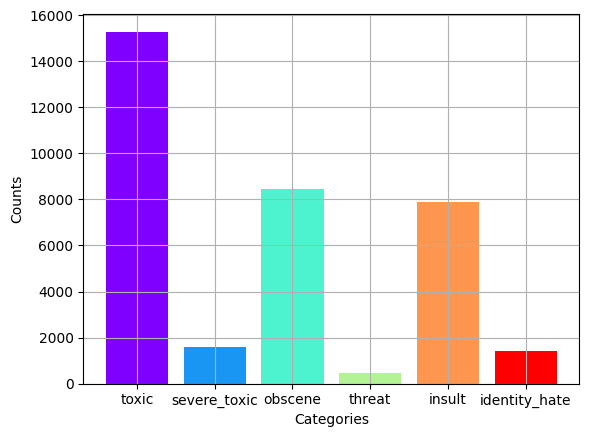

In [94]:
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(categories))))
plt.grid(True)
plt.xlabel("Categories")
plt.ylabel("Counts")
for i in range(len(categories)):
   c = next(color)
   plt.bar(categories[i], counts[i], color=c)
plt.show()

In [95]:
category_percent = counts / num_present * 100.0

In [97]:
category_percent

toxic            94.261941
severe_toxic      9.830508
obscene          52.073960
threat            2.946071
insult           48.548536
identity_hate     8.659476
dtype: float64